In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import platform
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from skimage import morphology, feature, transform, filters

In [2]:
try:
    from shapes import *
    from detect_bubbles import *
    from utils import *
except ImportError:
    pass

In [3]:
from classify_bubble import *
from bubbleNet1D import *

Using TensorFlow backend.


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
platform.system()

'Windows'

In [6]:
plat = platform.system()
if plat == "Darwin":
    calib_dir =  "/Users/Habib/Google Drive/Uni Heidelberg/11 WS 2017-2018/Masterarbeit/Messungen/Reihe_32_calib_radius" 
elif plat == "Windows":
    calib_dir = "../Messungen/Reihe_32_calib_radius/"

In [7]:
cim = []
bgim = []
filenames = []
for file in os.listdir(calib_dir):
    filenames.append(file)

filenames.sort() # sort after creation date since date is in the name

In [9]:
cim = []
bgim = []
for file in filenames[1:]:
    if file.endswith(".bmp"):
        if int(file[-5:-4])%2 ==0:
            img = cv2.imread(os.path.join(calib_dir, file), 0)
            cim.append(img)
        else:
            img = cv2.imread(os.path.join(calib_dir, file), 0)
            bgim.append(img)

In [128]:
"""
for idx, im in enumerate(cim):
    cv2.imwrite(os.path.join(calib_dir, "redlit", str(idx)+".bmp"), im)
for idx, im in enumerate(bgim):
    cv2.imwrite(os.path.join(calib_dir, "greenlit", str(idx)+".bmp"), im)
"""

In [37]:
track_dir = "data/tracking_data/"
red_tracks = [np.loadtxt(os.path.join(track_dir, file)) for file in os.listdir(track_dir) if file.startswith("red")]
green_tracks = [np.loadtxt(os.path.join(track_dir, file)) for file in os.listdir(track_dir) if file.startswith("green")]

In [11]:
green_tracks[0].T

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ],
       [ 0.26795667,  0.26795667,  0.33567742,  0.4036217 ,  0.47117892,
         0.53811222,  0.60354018,  0.67385519,  0.7461164 ,  0.81754947],
       [ 0.20746063,  0.20746063,  0.30195469,  0.39691159,  0.48988128,
         0.58122551,  0.66991621,  0.76052147,  0.85197794,  0.94325352]])

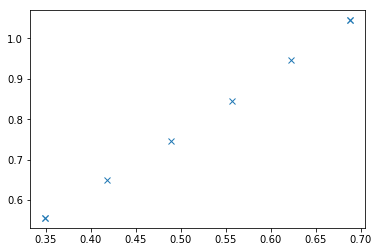

In [78]:
curr_tr = red_tracks[1].T
plt.plot(curr_tr[1] , curr_tr[2], 'x')

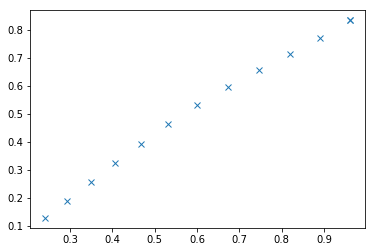

In [80]:
curr_tr = green_tracks[1].T
plt.plot(curr_tr[1] , curr_tr[2], 'x')

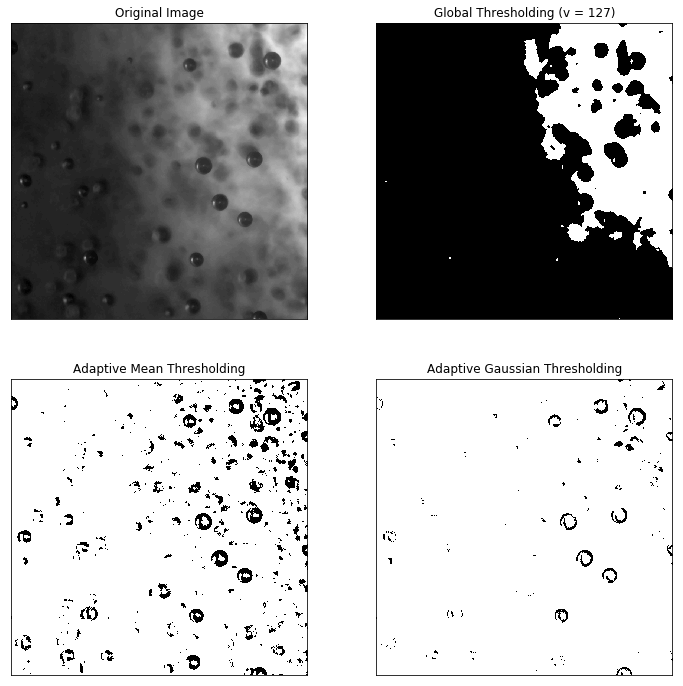

In [90]:
import cv2 as cv
img = bgim[0]
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,60,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,21,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,31,3)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

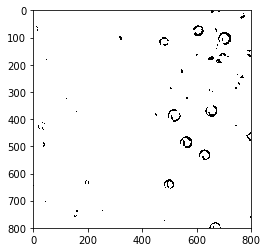

In [108]:
plt.imshow(morphology.closing(th3), cmap="gray")

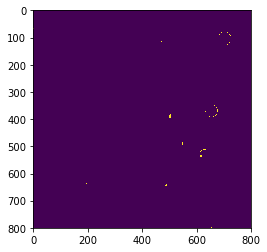

In [106]:
plt.imshow(feature.canny(img, sigma=0.2))

In [136]:
p = Point(0.2679566740989685*800, 0.20746062695980072*800)

In [138]:
a = ll_to_ul(p, 800)

In [141]:
p.get_coord()

(214.3653392791748, 165.96850156784058)

In [142]:
a.get_coord()

(214.3653392791748, 634.0314984321594)

In [215]:
img = bgim[0]
window_size = 30

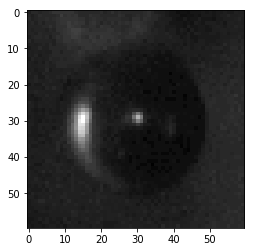

In [216]:
green_bubble = img[int(a.y-window_size):int(a.y+window_size), int(a.x-window_size):int(a.x+window_size)]
plt.imshow(green_bubble, cmap="gray")

In [170]:
from skimage.filters import try_all_threshold

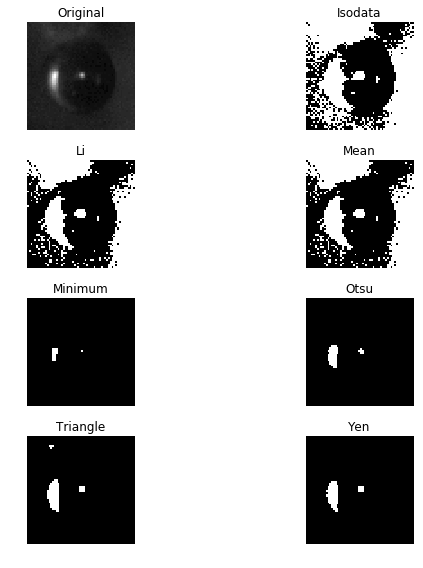

In [171]:
fig, ax = try_all_threshold(green_bubble, figsize=(10, 8), verbose=False)
plt.show()

In [175]:
vert_signal = green_bubble[:, int(green_bubble.shape[1]/2)]

(30, 50)

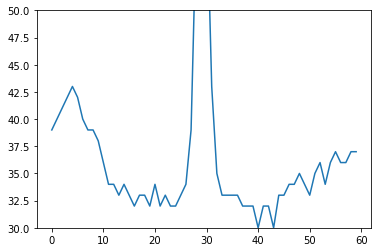

In [179]:
plt.plot(vert_signal)
plt.ylim(30,50)

In [230]:
from skimage.draw import circle_perimeter

In [382]:
edges = filters.sobel(green_bubble)
# Detect two radii
hough_radii = np.arange(10, 35, 1)
hough_res = transform.hough_circle(edges, hough_radii)

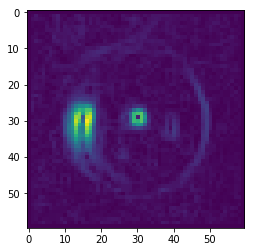

In [383]:
plt.imshow(edges)

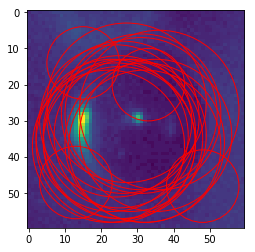

In [384]:
accums, cx, cy, radii = transform.hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=20)

res_circles = []
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
for center_y, center_x, radius in zip(cy, cx, radii):
    res_circles.append(Circle(center_x, center_y, radius))
    ax.add_patch(patches.Circle((center_y, center_x), radius, color="red", fill=False))
plt.imshow(green_bubble)

In [385]:
avg_x = np.mean([circ.x for circ in res_circles])
avg_y = np.mean([circ.y for circ in res_circles])
avg_r = np.mean([circ.radius for circ in res_circles])

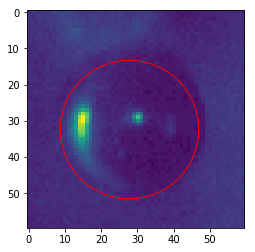

In [386]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
ax.add_patch(patches.Circle((avg_y, avg_x), avg_r, fill=False, color='r'))
plt.imshow(green_bubble)
            

In [315]:
a.get_coord()

(214.3653392791748, 634.0314984321594)

In [313]:
subimg = extract_pad_image(bgim[0], Point(a.y, a.x), window_size=60, pad_mode="constant")

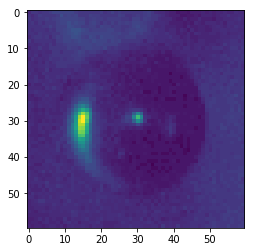

In [314]:
plt.imshow(subimg)

In [377]:
c = green_bubble_one(subimg, hough_radii=np.arange(20,35,1), total_num_peaks=10, max_offset=10)

In [444]:
c.radius

21.100000000000001

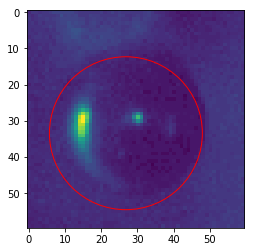

In [378]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
ax.add_patch(patches.Circle((c.y, c.x), c.radius, fill=False, color='r'))
plt.imshow(subimg)

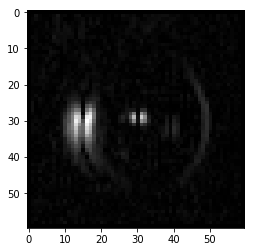

In [392]:
gb_grad = np.abs(filters.scharr_v(green_bubble))
plt.imshow(gb_grad, cmap="gray")

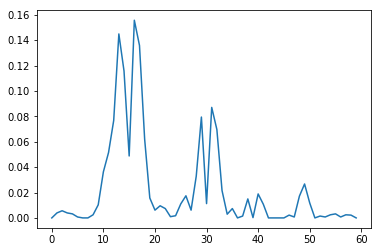

In [516]:
signal = gb_grad[30, :]
plt.plot(signal)

In [455]:
from scipy.signal import argrelextrema
from scipy.ndimage.filters import gaussian_filter1d

argrelextrema(gaussian_filter1d(signal, sigma=2), np.greater)

(array([ 2, 15, 31, 39, 49], dtype=int64),)

# Calibration

In [191]:
tracks = []
for file in os.listdir(track_dir):
    if file == "greenlit_green_bubble.csv":
        path = os.path.join(track_dir, file)
        tracks += [get_tracking_data(path, bgim[0].shape)]
        

##  1. Green bubbles

In [94]:
radii = []
sub_images = []
res_circles = []
for tr in tracks:
    for marker in tr:
        if marker.frame != 0:
            subimg = extract_pad_image(bgim[int(marker.frame)-1], Point(marker.y, marker.x), window_size=60, pad_mode="constant")
            sub_images.append(subimg)
            res_circ = green_bubble_one(subimg, method="hough", hough_radii=np.arange(20,35,1), total_num_peaks=10, max_offset=10)
            res_circles.append(res_circ)
            radii += [res_circ.radius]

In [95]:
marker.get_coord()

(654.03957366943359, 45.397186279296875)

In [793]:
(radii[1:])

[21.199999999999999,
 21.399999999999999,
 20.699999999999999,
 20.899999999999999,
 21.600000000000001,
 23.5,
 23.600000000000001,
 24.100000000000001]

In [794]:
np.std(radii[1:])

1.2823318603232168

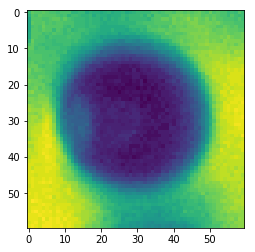

In [795]:
plt.imshow(sub_images[8])

In [796]:
subimg = sub_images[1]
circ = green_bubble_one(subimg, method="peak_dist", max_offset=10)

In [100]:
debug_signals = []
res_circles = []
for idx, subim in enumerate(sub_images):
    circ, signal = green_bubble_one(subim, method="peak_dist", max_offset=10, fit_refine=False)
    debug_signals.append(signal)
    res_circles.append(circ)

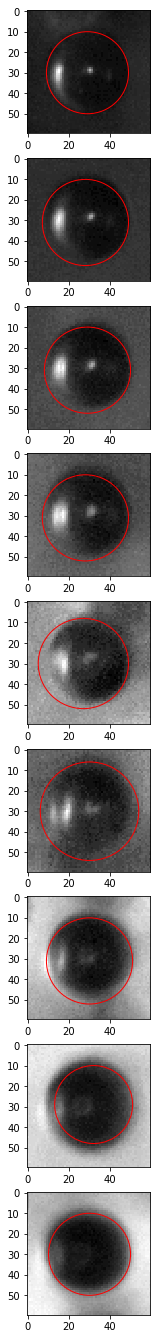

In [101]:
fig, ax = plt.subplots(len(sub_images),1)
fig.set_figheight(24)
for idx, subim in enumerate(sub_images):
    ax[idx].imshow(subim,'gray')
    circ = res_circles[idx]
    ax[idx].add_patch(plt.Circle((circ.x, circ.y), circ.radius, fill=False, color="red"))

In [102]:
green_radii = [circ.radius for circ in res_circles]

In [103]:
green_radii

[20.0, 21.0, 21.0, 21.0, 22.0, 24.0, 21.0, 19.0, 20.0]

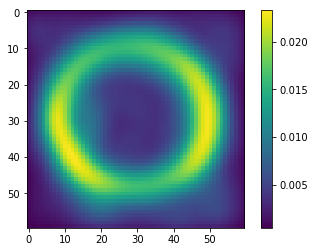

In [708]:
plt.imshow(filters.gaussian(sobel(subim), sigma=3))
plt.colorbar()

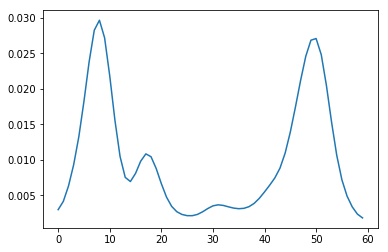

In [699]:
plt.plot(gaussian_filter1d(debug_signals[-1], 2))

## 2. Red bubbles

In [138]:
radii = []
sub_images = []
res_circles = []
for tr in tracks:
    for i in range(len(tr)-1):
        marker = tr[i]
        next_marker = tr[i+1]
        if marker.frame >= 0:
            est_pos_x = (marker.x + next_marker.x)/2
            est_pos_y = (marker.y + next_marker.y)/2
            est_marker = Point(est_pos_x, est_pos_y, marker.frame)
            subimg = extract_pad_image(cim[int(est_marker.frame)-1], 
                                       Point(est_marker.y, est_marker.x), 
                                       window_size=60, 
                                       pad_mode="constant")
            sub_images.append(subimg)
            res_circ = red_bubble_one(subimg, verbose=True)
            res_circles.append(res_circ)
            radii += [res_circ.radius]

#-#-#-#-#-#- new_bubble -#-#-#-#-#-#- []
[]
#-#-#-#-#-#- new_bubble -#-#-#-#-#-#- [[29 15]]
[[29 15]]
[[29 15]]
fit converged! mu= 2.55349905693
result point =  (29.0, 15.053499056934601)
samples 0: (29.0, 12.5)
len(samples) 5
result point:  (29.0, 14.5)
############ new position ############
curr_pos:  (29, 15)
curr_orientation 0.0
fit_line= (29, 15) (0.0, 1.0)
(29.0, 12.5) 26.5
(29.0, 13.5) 34.0
(29.0, 14.5) 41.75
(29.0, 15.5) 42.0
(29.0, 16.5) 35.75
refined_curr_pos= (29.0, 14.5)
current curve len 1
fit converged! mu= 2.64831991515
result point =  (28.292893218813454, 15.148319915151145)
samples 0: (28.292893218813454, 12.5)
len(samples) 5
result point:  (28.292893218813454, 14.5)
############ new position ############
curr_pos:  (28.292893218813454, 15.0)
curr_orientation 0.0
fit_line= (28.292893218813454, 15.0) (0.0, 1.0)
(28.292893218813454, 12.5) 12.8080582618
(28.292893218813454, 13.5) 16.2045048712
(28.292893218813454, 14.5) 19.9027281759
(28.292893218813454, 15.5) 20.38128156

current curve len 10
fit converged! mu= 5.47772930333
result point =  (36.071067811865461, 17.977729303331696)
samples 0: (36.071067811865461, 12.5)
len(samples) 10
result point:  (36.071067811865461, 15.0)
############ new position ############
curr_pos:  (36.071067811865461, 15.0)
curr_orientation 0.0
fit_line= (36.071067811865461, 15.0) (0.0, 1.0)
(36.071067811865461, 12.5) 10.4555826176
(36.071067811865461, 13.0) 22.3933982822
(36.071067811865461, 13.5) 12.1789321881
(36.071067811865461, 14.0) 26.3223304703
(36.071067811865461, 14.5) 13.4022817587
(36.071067811865461, 15.0) 27.2867965644
(36.071067811865461, 15.5) 13.1700487117
(36.071067811865461, 16.0) 25.3933982822
(36.071067811865461, 16.5) 11.8305826176
(36.071067811865461, 17.0) 21.9289321881
refined_curr_pos= (36.071067811865461, 15.0)
current curve len 11
fit converged! mu= 5.80827591132
result point =  (36.778174593052007, 18.30827591131737)
samples 0: (36.778174593052007, 12.5)
len(samples) 10
result point:  (36.778174593

curr_orientation 0.0
fit_line= (17.27207793864217, 15.0) (0.0, 1.0)
(17.27207793864217, 12.5) 6.44301948466
(17.27207793864217, 13.5) 6.625
(17.27207793864217, 14.5) 6.71599025767
(17.27207793864217, 15.5) 6.75
(17.27207793864217, 16.5) 6.76103896932
refined_curr_pos= (17.27207793864217, 15.5)
current curve len 19
fit converged! mu= 3.60593257606
result point =  (16.564971157455624, 16.105932576061146)
samples 0: (16.564971157455624, 12.5)
len(samples) 5
result point:  (16.564971157455624, 15.5)
############ new position ############
curr_pos:  (16.564971157455624, 15.0)
curr_orientation 0.0
fit_line= (16.564971157455624, 15.0) (0.0, 1.0)
(16.564971157455624, 12.5) 6.48375721064
(16.564971157455624, 13.5) 6.57062139468
(16.564971157455624, 14.5) 6.64124278936
(16.564971157455624, 15.5) 6.69562139468
(16.564971157455624, 16.5) 6.67937860532
refined_curr_pos= (16.564971157455624, 15.5)
current curve len 20
no fit, mu = 2
no fit, direction= <shapes.Point object at 0x000001B600F5B630>
samp

(42.72792206135783, 12.5) 6.94301948466
(42.72792206135783, 13.0) 14.1360389693
(42.72792206135783, 13.5) 7.10202922699
(42.72792206135783, 14.0) 14.2720779386
(42.72792206135783, 14.5) 7.60202922699
(42.72792206135783, 15.0) 16.1360389693
(42.72792206135783, 15.5) 8.10202922699
(42.72792206135783, 16.0) 16.2720779386
(42.72792206135783, 16.5) 8.22702922699
(42.72792206135783, 17.0) 16.6360389693
refined_curr_pos= (42.72792206135783, 15.0)
current curve len 19
no fit, mu = 5
no fit, direction= <shapes.Point object at 0x000001B5F7050C50>
samples 0: (43.435028842544376, 12.5)
len(samples) 10
result point:  (43.435028842544376, 15.0)
############ new position ############
curr_pos:  (43.435028842544376, 15.0)
curr_orientation 0.0
fit_line= (43.435028842544376, 15.0) (0.0, 1.0)
(43.435028842544376, 12.5) 6.76624278936
(43.435028842544376, 13.0) 13.7824855787
(43.435028842544376, 13.5) 6.94562139468
(43.435028842544376, 14.0) 14.0
(43.435028842544376, 14.5) 7.33686418405
(43.435028842544376

refined_curr_pos= (31.414213562373092, 16.0)
current curve len 3
fit converged! mu= 3.83903444696
result point =  (32.121320343559638, 18.339034446956429)
samples 0: (32.121320343559638, 14.5)
len(samples) 10
result point:  (32.121320343559638, 16.0)
############ new position ############
curr_pos:  (32.121320343559638, 17.0)
curr_orientation 0.0
fit_line= (32.121320343559638, 17.0) (0.0, 1.0)
(32.121320343559638, 14.5) 15.2688446994
(32.121320343559638, 15.0) 31.2573593129
(32.121320343559638, 15.5) 15.6286796564
(32.121320343559638, 16.0) 31.2573593129
(32.121320343559638, 16.5) 15.6135146135
(32.121320343559638, 17.0) 31.1966991411
(32.121320343559638, 17.5) 14.7536796564
(32.121320343559638, 18.0) 27.8180194847
(32.121320343559638, 18.5) 12.5643398282
(32.121320343559638, 19.0) 22.4393398282
refined_curr_pos= (32.121320343559638, 16.0)
current curve len 4
fit converged! mu= 3.88550232531
result point =  (32.828427124746185, 18.385502325310153)
samples 0: (32.828427124746185, 14.5)


result point =  (22.514718625761446, 16.259507151043678)
samples 0: (22.514718625761446, 14.5)
len(samples) 5
result point:  (22.514718625761446, 15.5)
############ new position ############
curr_pos:  (22.514718625761446, 17.0)
curr_orientation 0.0
fit_line= (22.514718625761446, 17.0) (0.0, 1.0)
(22.514718625761446, 14.5) 8.82537879754
(22.514718625761446, 15.5) 9.13603896932
(22.514718625761446, 16.5) 9.38603896932
(22.514718625761446, 17.5) 9.0716991411
(22.514718625761446, 18.5) 8.44301948466
refined_curr_pos= (22.514718625761446, 15.5)
current curve len 13
fit converged! mu= 1.95288352492
result point =  (21.8076118445749, 16.452883524915944)
samples 0: (21.8076118445749, 14.5)
len(samples) 5
result point:  (21.8076118445749, 15.5)
############ new position ############
curr_pos:  (21.8076118445749, 17.0)
curr_orientation 0.0
fit_line= (21.8076118445749, 17.0) (0.0, 1.0)
(21.8076118445749, 14.5) 8.32690296114
(21.8076118445749, 15.5) 8.60570888343
(21.8076118445749, 16.5) 8.855708

C:\Users\windis\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)



(40.899494936611646, 18.5) 8.92525253169
(40.899494936611646, 19.0) 17.6005050634
refined_curr_pos= (40.899494936611646, 17.0)
current curve len 15
no fit, mu = 5
no fit, direction= <shapes.Point object at 0x000001B600F74AC8>
samples 0: (41.606601717798192, 14.5)
len(samples) 10
result point:  (41.606601717798192, 17.0)
############ new position ############
curr_pos:  (41.606601717798192, 17.0)
curr_orientation 0.0
fit_line= (41.606601717798192, 17.0) (0.0, 1.0)
(41.606601717798192, 14.5) 8.34834957055
(41.606601717798192, 15.0) 17.0
(41.606601717798192, 15.5) 8.47334957055
(41.606601717798192, 16.0) 16.8933982822
(41.606601717798192, 16.5) 8.42417478528
(41.606601717798192, 17.0) 16.8033008589
(41.606601717798192, 17.5) 8.625
(41.606601717798192, 18.0) 17.6966991411
(41.606601717798192, 18.5) 8.72334957055
(41.606601717798192, 19.0) 17.1966991411
refined_curr_pos= (41.606601717798192, 17.0)
current curve len 16
no fit, mu = 5
no fit, direction= <shapes.Point object at 0x000001B5F705

fit converged! mu= 9.72461800732
result point =  (14.736544032709435, 25.224618007320906)
samples 0: (14.736544032709435, 15.5)
len(samples) 5
result point:  (14.736544032709435, 19.5)
############ new position ############
curr_pos:  (14.736544032709435, 18.0)
curr_orientation 0.0
fit_line= (14.736544032709435, 18.0) (0.0, 1.0)
(14.736544032709435, 15.5) 6.65793199591
(14.736544032709435, 16.5) 6.75
(14.736544032709435, 17.5) 6.93413600818
(14.736544032709435, 18.5) 7.02620401227
(14.736544032709435, 19.5) 7.11827201635
refined_curr_pos= (14.736544032709435, 19.5)
current curve len 24
fit converged! mu= 11.0343687233
result point =  (14.029437251522888, 26.534368723333898)
samples 0: (14.029437251522888, 15.5)
len(samples) 5
result point:  (14.029437251522888, 19.5)
############ new position ############
curr_pos:  (14.029437251522888, 18.0)
curr_orientation 0.0
fit_line= (14.029437251522888, 18.0) (0.0, 1.0)
(14.029437251522888, 15.5) 6.74632034356
(14.029437251522888, 16.5) 6.75
(14

result point:  (30.585786437626908, 10.5)
############ new position ############
curr_pos:  (30.585786437626908, 11.0)
curr_orientation 0.0
fit_line= (30.585786437626908, 11.0) (0.0, 1.0)
(30.585786437626908, 8.5) 8.49111652352
(30.585786437626908, 9.5) 9.96966991411
(30.585786437626908, 10.5) 11.5946699141
(30.585786437626908, 11.5) 12.2928932188
(30.585786437626908, 12.5) 11.3232233047
refined_curr_pos= (30.585786437626908, 10.5)
current curve len 3
fit converged! mu= 2.9918130643
result point =  (29.878679656440362, 11.49181306430085)
samples 0: (29.878679656440362, 8.5)
len(samples) 5
result point:  (29.878679656440362, 10.5)
############ new position ############
curr_pos:  (29.878679656440362, 11.0)
curr_orientation 0.0
fit_line= (29.878679656440362, 11.0) (0.0, 1.0)
(29.878679656440362, 8.5) 8.125
(29.878679656440362, 9.5) 9.70450487117
(29.878679656440362, 10.5) 11.3295048712
(29.878679656440362, 11.5) 11.9696699141
(29.878679656440362, 12.5) 11.2045048712
refined_curr_pos= (29

(34.121320343559638, 9.5) 9.96966991411
(34.121320343559638, 10.0) 21.3786796564
(34.121320343559638, 10.5) 11.2991747853
(34.121320343559638, 11.0) 23.8180194847
(34.121320343559638, 11.5) 11.9090097423
(34.121320343559638, 12.0) 23.8180194847
(34.121320343559638, 12.5) 11.5643398282
(34.121320343559638, 13.0) 22.4393398282
refined_curr_pos= (34.121320343559638, 12.5)
current curve len 4
fit converged! mu= 9.33407193177
result point =  (34.828427124746185, 17.834071931766591)
samples 0: (34.828427124746185, 8.5)
len(samples) 10
result point:  (34.828427124746185, 13.0)
############ new position ############
curr_pos:  (34.828427124746185, 11.0)
curr_orientation 0.0
fit_line= (34.828427124746185, 11.0) (0.0, 1.0)
(34.828427124746185, 8.5) 8.43933982822
(34.828427124746185, 9.0) 18.5
(34.828427124746185, 9.5) 9.79289321881
(34.828427124746185, 10.0) 20.6715728753
(34.828427124746185, 10.5) 10.857233047
(34.828427124746185, 11.0) 22.7573593129
(34.828427124746185, 11.5) 11.3786796564
(34

refined_curr_pos= (31.292893218813454, 16.5)
current curve len 2
fit converged! mu= 11.6478806246
result point =  (30.585786437626908, 24.147880624560557)
samples 0: (30.585786437626908, 12.5)
len(samples) 5
result point:  (30.585786437626908, 16.5)
############ new position ############
curr_pos:  (30.585786437626908, 15.0)
curr_orientation 0.0
fit_line= (30.585786437626908, 15.0) (0.0, 1.0)
(30.585786437626908, 12.5) 11.1982233047
(30.585786437626908, 13.5) 11.4696699141
(30.585786437626908, 14.5) 12.1161165235
(30.585786437626908, 15.5) 13.0428932188
(30.585786437626908, 16.5) 13.0946699141
refined_curr_pos= (30.585786437626908, 16.5)
current curve len 3
no fit, mu = 2
no fit, direction= <shapes.Point object at 0x000001B600F53908>
samples 0: (29.878679656440362, 12.5)
len(samples) 5
result point:  (29.878679656440362, 14.5)
############ new position ############
curr_pos:  (29.878679656440362, 15.0)
curr_orientation 0.0
fit_line= (29.878679656440362, 15.0) (0.0, 1.0)
(29.87867965644

current curve len 12
fit converged! mu= 6.74031235479
result point =  (40.485281374238554, 19.240312354788802)
samples 0: (40.485281374238554, 12.5)
len(samples) 10
result point:  (40.485281374238554, 15.5)
############ new position ############
curr_pos:  (40.485281374238554, 15.0)
curr_orientation 0.0
fit_line= (40.485281374238554, 15.0) (0.0, 1.0)
(40.485281374238554, 12.5) 8.6966991411
(40.485281374238554, 13.0) 17.5147186258
(40.485281374238554, 13.5) 8.88235931288
(40.485281374238554, 14.0) 18.0147186258
(40.485281374238554, 14.5) 9.06801948466
(40.485281374238554, 15.0) 18.2573593129
(40.485281374238554, 15.5) 9.13235931288
(40.485281374238554, 16.0) 18.2720779386
(40.485281374238554, 16.5) 8.69301948466
(40.485281374238554, 17.0) 16.5
refined_curr_pos= (40.485281374238554, 15.5)
current curve len 13
fit converged! mu= 7.29496512982
result point =  (41.1923881554251, 19.794965129815928)
samples 0: (41.1923881554251, 12.5)
len(samples) 10
result point:  (41.1923881554251, 16.0)
#

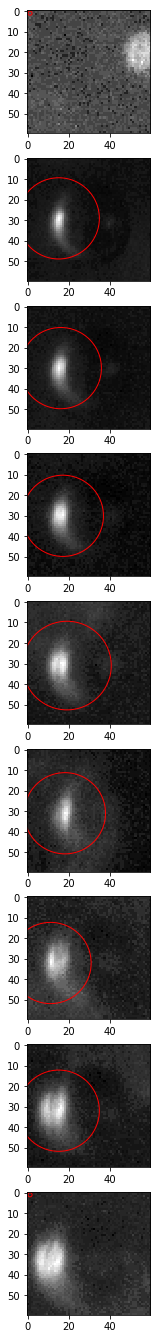

In [139]:
fig, ax = plt.subplots(len(sub_images),1)
fig.set_figheight(24)
for idx, subim in enumerate(sub_images):
    ax[idx].imshow(subim,'gray')
    circ = res_circles[idx]
    ax[idx].add_patch(plt.Circle((circ.y, circ.x), circ.radius, fill=False, color="red"))

In [141]:
red_radii = [circ.radius for circ in res_circles if circ.radius>1]

In [142]:
red_radii

[19.798989873223292,
 19.798989873223292,
 19.798989873223292,
 21.60255231704279,
 19.798989873223292,
 19.798989873223292,
 19.798989873223292]

In [143]:
np.mean(red_radii)

20.056641650911793

In [144]:
np.std(red_radii)

0.63111538665783184

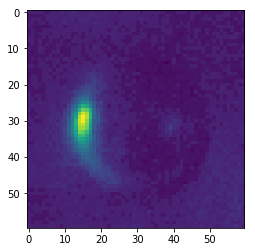

In [76]:
subimg = sub_images[1]
plt.imshow(subimg)

In [ ]:
curve_from_orientation_fit()

In [260]:
img1 = cim[0]

In [ ]:
pred_lb = detec_bubble(img1, 
                       calib_radius_func=lambda x: x, 
                       threshold_abs=20,
                       min_distance = 10,
                       classifier="cnn", 
                       output_shape="Rectangle", 
                       signal_len=10,
                       signal_inverted=True)

In [ ]:
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111, aspect='equal')
plt.imshow(img1, cmap="gray")

for pr in pred_lb:
            ax1.add_patch(
                        patches.Rectangle(
                            (pr.xmin, pr.ymin),   
                            pr.width,
                            pr.height,
                            fill=False,
                            color="green"))

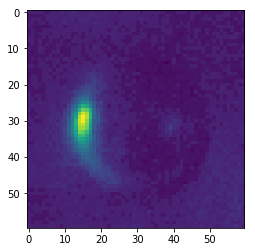

In [42]:
plt.imshow(sub_images[1])

In [187]:
img1 = sub_images[2]

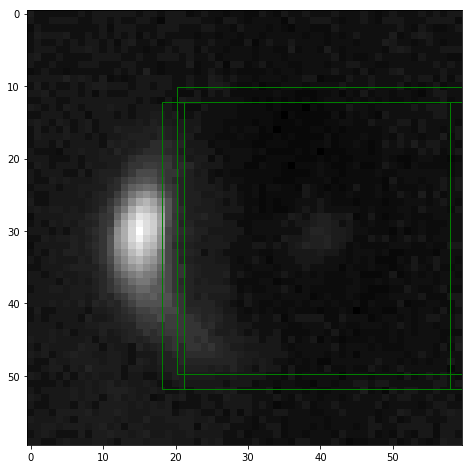

In [188]:
pred_lb = detec_bubble(img1, 
                       calib_radius_func=lambda x: x, 
                       threshold_abs=20,
                       min_distance = 10,
                       classifier="cnn", 
                       output_shape="Rectangle", 
                       signal_len=10,
                       signal_inverted=True)

fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111, aspect='equal')
plt.imshow(img1, cmap="gray")

for pr in pred_lb:
            ax1.add_patch(
                        patches.Rectangle(
                            (pr.xmin, pr.ymin),   
                            pr.width,
                            pr.height,
                            fill=False,
                            color="green"))

In [189]:
print([pr.width/2 for pr in pred_lb])

[19.798989873223334, 19.798989873223334, 0.0, 19.798989873223334, 0.0, 0.0]


In [190]:
radii = []
sub_images = []
res_rectangles = []
for tr in tracks:
    for i in range(len(tr)-1):
        marker = tr[i]
        next_marker = tr[i+1]
        if marker.frame >= 0:
            print("marker.frame:", marker.frame)
            est_pos_x = (marker.x + next_marker.x)/2
            est_pos_y = (marker.y + next_marker.y)/2
            est_marker = Point(est_pos_x, est_pos_y, marker.frame)
            subimg = extract_pad_image(cim[int(est_marker.frame)-1], 
                                       Point(est_marker.y, est_marker.x), 
                                       window_size=60, 
                                       pad_mode="constant")
            sub_images.append(subimg)
            pred_lb = detec_bubble(subimg, 
                       calib_radius_func=lambda x: x, 
                       threshold_abs=50,
                       min_distance = 10,
                       classifier="cnn", 
                       output_shape="Rectangle", 
                       signal_len=10,
                       signal_inverted=True)
            print([pr.width/2 for pr in pred_lb])
            res_rectangles += pred_lb

marker.frame: 0
[]
marker.frame: 1
[19.798989873223334]
marker.frame: 2
[0.0]
marker.frame: 3
[19.798989873223334]
marker.frame: 4
[19.798989873223334, 19.798989873223334, 19.798989873223334]
marker.frame: 5
[19.798989873223334]
marker.frame: 6
[0.0]
marker.frame: 7
[19.798989873223334, 19.798989873223334]
marker.frame: 8
[]


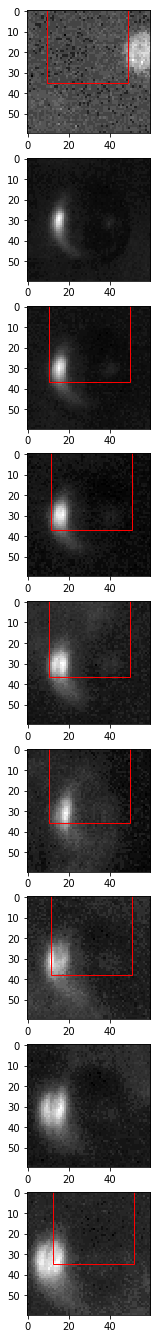

In [166]:
fig, ax = plt.subplots(len(sub_images),1)
fig.set_figheight(24)
for idx, subim in enumerate(sub_images):
    ax[idx].imshow(subim,'gray')
    rec = res_rectangles[idx]
    ax[idx].add_patch(plt.Rectangle((rec.ymin, rec.xmin), rec.width, rec.height, fill=False, color="red"))

In [167]:
red_cnn_radii = [rec.width/2 for rec in res_rectangles]

In [168]:
red_cnn_radii

[19.798989873223334,
 0.0,
 19.798989873223334,
 19.798989873223334,
 19.798989873223334,
 19.798989873223334,
 19.798989873223334,
 0.0,
 19.798989873223334,
 19.798989873223334]

## Calibration for multiple bubbles

### Green

In [195]:
all_tracks = []
for file in os.listdir(track_dir):
    if file.endswith(".csv"):
        path = os.path.join(track_dir, file)
        all_tracks += [get_tracking_data(path, bgim[0].shape)]
        

In [228]:
green_radii = list()
green_radii_std = list()
sub_images = list()
res_circles = list()
for tr in all_tracks:
    bubble_radius = []
    for marker in tr:
        if marker.frame != 0 and not marker.has_negative_coord():
            subimg = extract_pad_image(bgim[int(marker.frame)-1], Point(marker.y, marker.x), window_size=60, pad_mode="constant")
            sub_images.append(subimg)
            res_circ = green_bubble_one(subimg, method="hough", hough_radii=np.arange(20,35,1), total_num_peaks=10, max_offset=10)
            res_circles.append(res_circ)
            if res_circ.radius >1:
                bubble_radius += [res_circ.radius]
    green_radii += [np.mean(bubble_radius)]
    green_radii_std += [np.std(bubble_radius)]

In [229]:
green_radii

[22.011111111111109, 22.0, 23.0625, 21.516666666666666, 21.889999999999997]

In [230]:
green_radii_std

[1.2511722898008226,
 1.1898379241368491,
 1.2834888974977536,
 0.24094720491334906,
 0.8619164692706599]

### Red

In [235]:
red_radii = []
sub_images = []
res_circles = []
red_radii_std = []
for tr in all_tracks:
    bubble_radius = []
    for i in range(len(tr)-1):
        marker = tr[i]
        next_marker = tr[i+1]
        if marker.frame >= 0:
            est_pos_x = (marker.x + next_marker.x)/2
            est_pos_y = (marker.y + next_marker.y)/2
            est_marker = Point(est_pos_x, est_pos_y, marker.frame)
            subimg = extract_pad_image(cim[int(est_marker.frame)-1], 
                                       Point(est_marker.y, est_marker.x), 
                                       window_size=60, 
                                       pad_mode="constant")
            sub_images.append(subimg)
            res_circ = red_bubble_one(subimg, verbose=False)
            res_circles.append(res_circ)
            if res_circ.radius>1:
                bubble_radius.append(res_circ.radius)
            
    red_radii += [np.mean(bubble_radius)]
    red_radii_std += [np.std(bubble_radius)]
    

[[29 15]]
fit converged! mu= 2.55349905693
result point =  (29.0, 15.053499056934601)
samples 0: (29.0, 12.5)
len(samples) 5
result point:  (29.0, 14.5)
fit converged! mu= 2.64831991515
result point =  (28.292893218813454, 15.148319915151145)
samples 0: (28.292893218813454, 12.5)
len(samples) 5
result point:  (28.292893218813454, 14.5)
fit converged! mu= 2.77935275092
result point =  (27.585786437626908, 15.279352750915322)
samples 0: (27.585786437626908, 12.5)
len(samples) 5
result point:  (27.585786437626908, 14.5)
fit converged! mu= 2.92861892314
result point =  (26.878679656440362, 15.428618923140101)
samples 0: (26.878679656440362, 12.5)
len(samples) 5
result point:  (26.878679656440362, 14.5)
fit converged! mu= 2.85089888134
result point =  (26.171572875253815, 15.350898881337562)
samples 0: (26.171572875253815, 12.5)
len(samples) 5
result point:  (26.171572875253815, 14.5)
fit converged! mu= 2.90386512142
result point =  (25.464466094067269, 15.403865121415659)
samples 0: (25.46

result point =  (29.292893218813454, 15.274150234455)
samples 0: (29.292893218813454, 12.5)
len(samples) 5
result point:  (29.292893218813454, 14.5)
fit converged! mu= 2.91292837773
result point =  (28.585786437626908, 15.412928377732612)
samples 0: (28.585786437626908, 12.5)
len(samples) 5
result point:  (28.585786437626908, 14.5)
fit converged! mu= 3.08269337351
result point =  (27.878679656440362, 15.582693373509416)
samples 0: (27.878679656440362, 12.5)
len(samples) 5
result point:  (27.878679656440362, 15.5)
fit converged! mu= 3.07294747331
result point =  (27.171572875253815, 15.572947473314722)
samples 0: (27.171572875253815, 12.5)
len(samples) 5
result point:  (27.171572875253815, 15.5)
fit converged! mu= 3.28253686561
result point =  (26.464466094067269, 15.78253686561415)
samples 0: (26.464466094067269, 12.5)
len(samples) 5
result point:  (26.464466094067269, 15.5)
fit converged! mu= 3.54152354183
result point =  (25.757359312880723, 16.041523541827111)
samples 0: (25.7573593

len(samples) 10
result point:  (38.485281374238554, 18.0)
fit converged! mu= 8.11824758186
result point =  (39.1923881554251, 22.618247581859009)
samples 0: (39.1923881554251, 14.5)
len(samples) 10
result point:  (39.1923881554251, 18.5)
fit converged! mu= 8.88413378723
result point =  (39.899494936611646, 23.384133787228201)
samples 0: (39.899494936611646, 14.5)
len(samples) 10
result point:  (39.899494936611646, 18.5)
fit converged! mu= 13.0853714622
result point =  (40.606601717798192, 27.58537146223977)
samples 0: (40.606601717798192, 14.5)
len(samples) 10
result point:  (40.606601717798192, 19.0)
fit converged! mu= 53.1569071597
result point =  (41.313708498984738, 67.656907159715587)
samples 0: (41.313708498984738, 14.5)
len(samples) 10
result point:  (41.313708498984738, 19.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (42.020815280171284, 14.5)
len(samples) 10
result point:  (42.020815280171284, 17.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (42.7279

C:\Users\windis\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


 11.0343687233
result point =  (14.029437251522888, 26.534368723333898)
samples 0: (14.029437251522888, 15.5)
len(samples) 5
result point:  (14.029437251522888, 19.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (13.32233047033634, 15.5)
len(samples) 5
result point:  (13.32233047033634, 17.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (12.615223689149792, 15.5)
len(samples) 5
result point:  (12.615223689149792, 17.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (11.908116907963244, 15.5)
len(samples) 5
result point:  (11.908116907963244, 17.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (11.201010126776696, 15.5)
len(samples) 5
result point:  (11.201010126776696, 17.5)
fit converged! mu= 6.88398859781
result point =  (31.0, 22.38398859780505)
samples 0: (31.0, 15.5)
len(samples) 10
result point:  (31.0, 18.5)
fit converged! mu= 6.41554613494
result point =  (31.707106781186546, 21.915546134935539)
samples 0: (31.707106781186546, 15.5)
len(

no fit, direction= (0.0, 1.0)
samples 0: (24.221825406947993, 12.5)
len(samples) 5
result point:  (24.221825406947993, 14.5)
fit converged! mu= 20.0523769937
result point =  (23.514718625761446, 32.552376993682287)
samples 0: (23.514718625761446, 12.5)
len(samples) 5
result point:  (23.514718625761446, 16.5)
fit converged! mu= 6.99548300207
result point =  (22.8076118445749, 19.49548300207103)
samples 0: (22.8076118445749, 12.5)
len(samples) 5
result point:  (22.8076118445749, 16.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (22.100505063388354, 12.5)
len(samples) 5
result point:  (22.100505063388354, 14.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (21.393398282201808, 12.5)
len(samples) 5
result point:  (21.393398282201808, 14.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (20.686291501015262, 12.5)
len(samples) 5
result point:  (20.686291501015262, 14.5)
fit converged! mu= 2.76392605013
result point =  (19.979184719828716, 15.26392605013022)
sam

result point:  (46.556349186104015, 24.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (47.263455967290561, 19.5)
len(samples) 10
result point:  (47.263455967290561, 22.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (47.970562748477107, 19.5)
len(samples) 10
result point:  (47.970562748477107, 22.0)
fit converged! mu= 76.6191531777
result point =  (48.677669529663653, 96.119153177697683)
samples 0: (48.677669529663653, 19.5)
len(samples) 10
result point:  (48.677669529663653, 24.0)
fit converged! mu= 18.3939330982
result point =  (49.384776310850199, 37.893933098243757)
samples 0: (49.384776310850199, 19.5)
len(samples) 10
result point:  (49.384776310850199, 24.0)
fit converged! mu= 10.9592642693
result point =  (50.091883092036745, 30.459264269342412)
samples 0: (50.091883092036745, 19.5)
len(samples) 10
result point:  (50.091883092036745, 24.0)
fit converged! mu= 17.279859617
result point =  (50.798989873223292, 36.779859617014409)
samples 0: (50.79898987322329

result point:  (33.828427124746185, 22.0)
fit converged! mu= 5.68739734638
result point =  (34.535533905932731, 25.187397346376372)
samples 0: (34.535533905932731, 19.5)
len(samples) 10
result point:  (34.535533905932731, 22.0)
fit converged! mu= 6.0621581376
result point =  (35.242640687119277, 25.562158137597471)
samples 0: (35.242640687119277, 19.5)
len(samples) 10
result point:  (35.242640687119277, 22.5)
fit converged! mu= 6.41446729416
result point =  (35.949747468305823, 25.914467294155624)
samples 0: (35.949747468305823, 19.5)
len(samples) 10
result point:  (35.949747468305823, 22.5)
fit converged! mu= 7.91522560313
result point =  (36.656854249492369, 27.415225603130377)
samples 0: (36.656854249492369, 19.5)
len(samples) 10
result point:  (36.656854249492369, 23.0)
fit converged! mu= 12.8470634781
result point =  (37.363961030678915, 32.347063478116524)
samples 0: (37.363961030678915, 19.5)
len(samples) 10
result point:  (37.363961030678915, 24.0)
fit converged! mu= 48.7594466

no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (20.393398282201808, 20.5)
len(samples) 5
result point:  (20.393398282201808, 22.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (19.686291501015262, 20.5)
len(samples) 5
result point:  (19.686291501015262, 22.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (18.979184719828716, 20.5)
len(samples) 5
result point:  (18.979184719828716, 22.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (18.27207793864217, 20.5)
len(samples) 5
result point:  (18.27207793864217, 22.5)
fit converged! mu= 3.18105475203
result point =  (17.564971157455624, 23.681054752029709)
samples 0: (17.564971157455624, 20.5)
len(samples) 5
result point:  (17.564971157455624, 23.5)
fit converged! mu= 2.47641792163
result point =  (16.857864376269077, 22.97641792162889)
samples 0: (16.857864376269077, 20.5)
len(samples) 5
result point:  (16.857864376269077, 22.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (16.1507575950825

result point:  (49.677669529663653, 23.5)
fit converged! mu= 15.0091461116
result point =  (50.384776310850199, 34.509146111618747)
samples 0: (50.384776310850199, 19.5)
len(samples) 10
result point:  (50.384776310850199, 24.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (51.091883092036745, 19.5)
len(samples) 10
result point:  (51.091883092036745, 22.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (51.798989873223292, 19.5)
len(samples) 10
result point:  (51.798989873223292, 22.0)
no fit!
[[32 23]]
fit converged! mu= 1.75873705332
result point =  (32.0, 22.258737053319631)
samples 0: (32.0, 20.5)
len(samples) 5
result point:  (32.0, 21.5)
fit converged! mu= 1.83161216383
result point =  (31.292893218813454, 22.331612163825138)
samples 0: (31.292893218813454, 20.5)
len(samples) 5
result point:  (31.292893218813454, 21.5)
fit converged! mu= 1.88648373893
result point =  (30.585786437626908, 22.386483738931197)
samples 0: (30.585786437626908, 20.5)
len(samples) 5
r

samples 0: (40.778174593052007, 18.5)
len(samples) 10
result point:  (40.778174593052007, 21.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (41.485281374238554, 18.5)
len(samples) 10
result point:  (41.485281374238554, 21.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (42.1923881554251, 18.5)
len(samples) 10
result point:  (42.1923881554251, 21.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (42.899494936611646, 18.5)
len(samples) 10
result point:  (42.899494936611646, 21.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (43.606601717798192, 18.5)
len(samples) 10
result point:  (43.606601717798192, 21.0)
fit converged! mu= 14.4563932777
result point =  (44.313708498984738, 32.956393277673023)
samples 0: (44.313708498984738, 18.5)
len(samples) 10
result point:  (44.313708498984738, 23.0)
fit converged! mu= 15.4610236364
result point =  (45.020815280171284, 33.961023636368061)
samples 0: (45.020815280171284, 18.5)
len(samples) 10
result point: 

result point:  (12.73654403270943, 9.5)
fit converged! mu= 2.71182410753
result point =  (12.029437251522882, 10.211824107533753)
samples 0: (12.029437251522882, 7.5)
len(samples) 5
result point:  (12.029437251522882, 9.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (11.322330470336334, 7.5)
len(samples) 5
result point:  (11.322330470336334, 9.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (10.615223689149786, 7.5)
len(samples) 5
result point:  (10.615223689149786, 9.5)
fit converged! mu= 4.14202010714
result point =  (9.9081169079632385, 11.642020107144948)
samples 0: (9.9081169079632385, 7.5)
len(samples) 5
result point:  (9.9081169079632385, 11.5)
fit converged! mu= 5.02983251255
result point =  (9.2010101267766906, 12.529832512548648)
samples 0: (9.2010101267766906, 7.5)
len(samples) 5
result point:  (9.2010101267766906, 11.5)
fit converged! mu= 4.94276818835
result point =  (29.0, 12.44276818834507)
samples 0: (29.0, 7.5)
len(samples) 10
result point:  (29.

result point:  (27.050252531694177, 9.5)
fit converged! mu= 3.07037717664
result point =  (26.343145750507631, 10.570377176637949)
samples 0: (26.343145750507631, 7.5)
len(samples) 5
result point:  (26.343145750507631, 10.5)
fit converged! mu= 3.39939586154
result point =  (25.636038969321085, 10.899395861537968)
samples 0: (25.636038969321085, 7.5)
len(samples) 5
result point:  (25.636038969321085, 10.5)
fit converged! mu= 3.92554653741
result point =  (24.928932188134539, 11.425546537408353)
samples 0: (24.928932188134539, 7.5)
len(samples) 5
result point:  (24.928932188134539, 10.5)
fit converged! mu= 3.50505385152
result point =  (24.221825406947993, 11.005053851517326)
samples 0: (24.221825406947993, 7.5)
len(samples) 5
result point:  (24.221825406947993, 10.5)
fit converged! mu= 3.81529002781
result point =  (23.514718625761446, 11.315290027809557)
samples 0: (23.514718625761446, 7.5)
len(samples) 5
result point:  (23.514718625761446, 10.5)
fit converged! mu= 5.0024250671
result 

no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (49.435028842544376, 7.5)
len(samples) 10
result point:  (49.435028842544376, 10.0)
fit converged! mu= 162.983254955
result point =  (50.142135623730923, 170.4832549550803)
samples 0: (50.142135623730923, 7.5)
len(samples) 10
result point:  (50.142135623730923, 12.0)
fit converged! mu= 24.855729288
result point =  (50.849242404917469, 32.355729288011361)
samples 0: (50.849242404917469, 7.5)
len(samples) 10
result point:  (50.849242404917469, 12.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (51.556349186104015, 7.5)
len(samples) 10
result point:  (51.556349186104015, 10.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (52.263455967290561, 7.5)
len(samples) 10
result point:  (52.263455967290561, 10.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (52.970562748477107, 7.5)
len(samples) 10
result point:  (52.970562748477107, 10.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (53.677669529663

result point =  (32.828427124746185, 23.764812654261927)
samples 0: (32.828427124746185, 19.5)
len(samples) 10
result point:  (32.828427124746185, 21.5)
fit converged! mu= 4.37107146387
result point =  (33.535533905932731, 23.871071463869491)
samples 0: (33.535533905932731, 19.5)
len(samples) 10
result point:  (33.535533905932731, 21.5)
fit converged! mu= 4.57143104562
result point =  (34.242640687119277, 24.071431045616034)
samples 0: (34.242640687119277, 19.5)
len(samples) 10
result point:  (34.242640687119277, 21.5)
fit converged! mu= 5.03963479514
result point =  (34.949747468305823, 24.539634795138404)
samples 0: (34.949747468305823, 19.5)
len(samples) 10
result point:  (34.949747468305823, 22.0)
fit converged! mu= 5.49356620145
result point =  (35.656854249492369, 24.993566201454829)
samples 0: (35.656854249492369, 19.5)
len(samples) 10
result point:  (35.656854249492369, 22.0)
fit converged! mu= 6.7090754274
result point =  (36.363961030678915, 26.209075427404279)
samples 0: (36

result point:  (20.393398282201808, 20.5)
fit converged! mu= -53.9452987854
result point =  (19.686291501015262, -35.445298785413321)
samples 0: (19.686291501015262, 18.5)
len(samples) 5
result point:  (19.686291501015262, 18.5)
fit converged! mu= -8.31671794004
result point =  (18.979184719828716, 10.183282059955385)
samples 0: (18.979184719828716, 18.5)
len(samples) 5
result point:  (18.979184719828716, 18.5)
fit converged! mu= 2.59806778516
result point =  (18.27207793864217, 21.098067785158786)
samples 0: (18.27207793864217, 18.5)
len(samples) 5
result point:  (18.27207793864217, 20.5)
fit converged! mu= 2.32776648817
result point =  (17.564971157455624, 20.827766488169363)
samples 0: (17.564971157455624, 18.5)
len(samples) 5
result point:  (17.564971157455624, 20.5)
fit converged! mu= -3.07367413626
result point =  (16.857864376269077, 15.426325863742708)
samples 0: (16.857864376269077, 18.5)
len(samples) 5
result point:  (16.857864376269077, 18.5)
no fit, mu = 2
no fit, direction

fit converged! mu= 2.83924895122
result point =  (30.0, 19.33924895122291)
samples 0: (30.0, 16.5)
len(samples) 5
result point:  (30.0, 18.5)
fit converged! mu= 2.88073436725
result point =  (29.292893218813454, 19.380734367246507)
samples 0: (29.292893218813454, 16.5)
len(samples) 5
result point:  (29.292893218813454, 18.5)
fit converged! mu= 2.7959337417
result point =  (28.585786437626908, 19.295933741695624)
samples 0: (28.585786437626908, 16.5)
len(samples) 5
result point:  (28.585786437626908, 18.5)
fit converged! mu= 2.56739044311
result point =  (27.878679656440362, 19.067390443109968)
samples 0: (27.878679656440362, 16.5)
len(samples) 5
result point:  (27.878679656440362, 18.5)
fit converged! mu= 2.40200862525
result point =  (27.171572875253815, 18.902008625253671)
samples 0: (27.171572875253815, 16.5)
len(samples) 5
result point:  (27.171572875253815, 18.5)
fit converged! mu= 2.45790227418
result point =  (26.464466094067269, 18.957902274179954)
samples 0: (26.46446609406726

result point:  (38.778174593052007, 20.0)
fit converged! mu= 24.5954165618
result point =  (39.485281374238554, 40.095416561761652)
samples 0: (39.485281374238554, 15.5)
len(samples) 10
result point:  (39.485281374238554, 20.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (40.1923881554251, 15.5)
len(samples) 10
result point:  (40.1923881554251, 18.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (40.899494936611646, 15.5)
len(samples) 10
result point:  (40.899494936611646, 18.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (41.606601717798192, 15.5)
len(samples) 10
result point:  (41.606601717798192, 18.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (42.313708498984738, 15.5)
len(samples) 10
result point:  (42.313708498984738, 18.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (43.020815280171284, 15.5)
len(samples) 10
result point:  (43.020815280171284, 18.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (43.72792206135

samples 0: (13.615223689149794, 16.5)
len(samples) 5
result point:  (13.615223689149794, 18.5)
fit converged! mu= -3.48159004006
result point =  (12.908116907963246, 13.018409959937745)
samples 0: (12.908116907963246, 16.5)
len(samples) 5
result point:  (12.908116907963246, 16.5)
fit converged! mu= 1.43725475885
result point =  (12.201010126776698, 17.937254758852667)
samples 0: (12.201010126776698, 16.5)
len(samples) 5
result point:  (12.201010126776698, 17.5)
fit converged! mu= 6.02970059256
result point =  (32.0, 22.529700592558861)
samples 0: (32.0, 16.5)
len(samples) 10
result point:  (32.0, 19.5)
fit converged! mu= 5.9189905718
result point =  (32.707106781186546, 22.418990571795543)
samples 0: (32.707106781186546, 16.5)
len(samples) 10
result point:  (32.707106781186546, 19.0)
fit converged! mu= 5.80336625425
result point =  (33.414213562373092, 22.30336625424717)
samples 0: (33.414213562373092, 16.5)
len(samples) 10
result point:  (33.414213562373092, 19.0)
fit converged! mu= 5

result point:  (24.928932188134539, 17.5)
fit converged! mu= 34.8153597684
result point =  (24.221825406947993, 50.31535976841986)
samples 0: (24.221825406947993, 15.5)
len(samples) 5
result point:  (24.221825406947993, 19.5)
fit converged! mu= 7.7297428484
result point =  (23.514718625761446, 23.22974284840366)
samples 0: (23.514718625761446, 15.5)
len(samples) 5
result point:  (23.514718625761446, 19.5)
fit converged! mu= 5.4143373726
result point =  (22.8076118445749, 20.914337372597263)
samples 0: (22.8076118445749, 15.5)
len(samples) 5
result point:  (22.8076118445749, 19.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (22.100505063388354, 15.5)
len(samples) 5
result point:  (22.100505063388354, 17.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (21.393398282201808, 15.5)
len(samples) 5
result point:  (21.393398282201808, 17.5)
no fit, mu = 2
no fit, direction= (0.0, 1.0)
samples 0: (20.686291501015262, 15.5)
len(samples) 5
result point:  (20.686291501015262,

result point:  (45.72792206135783, 20.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (46.435028842544376, 15.5)
len(samples) 10
result point:  (46.435028842544376, 18.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (47.142135623730923, 15.5)
len(samples) 10
result point:  (47.142135623730923, 18.0)
fit converged! mu= 14.2438156246
result point =  (47.849242404917469, 29.743815624620286)
samples 0: (47.849242404917469, 15.5)
len(samples) 10
result point:  (47.849242404917469, 20.0)
fit converged! mu= 13.2618873874
result point =  (48.556349186104015, 28.761887387361156)
samples 0: (48.556349186104015, 15.5)
len(samples) 10
result point:  (48.556349186104015, 20.0)
fit converged! mu= 74.7508695936
result point =  (49.263455967290561, 90.250869593632871)
samples 0: (49.263455967290561, 15.5)
len(samples) 10
result point:  (49.263455967290561, 20.0)
no fit, mu = 5
no fit, direction= (0.0, 1.0)
samples 0: (49.970562748477107, 15.5)
len(samples) 10
result point:  (49.9

In [252]:
red_radii

[20.056641650911793,
 20.598332617039897,
 19.798989873223292,
 21.007471142313612,
 20.076034271945744]

## Results

<Container object of 3 artists>

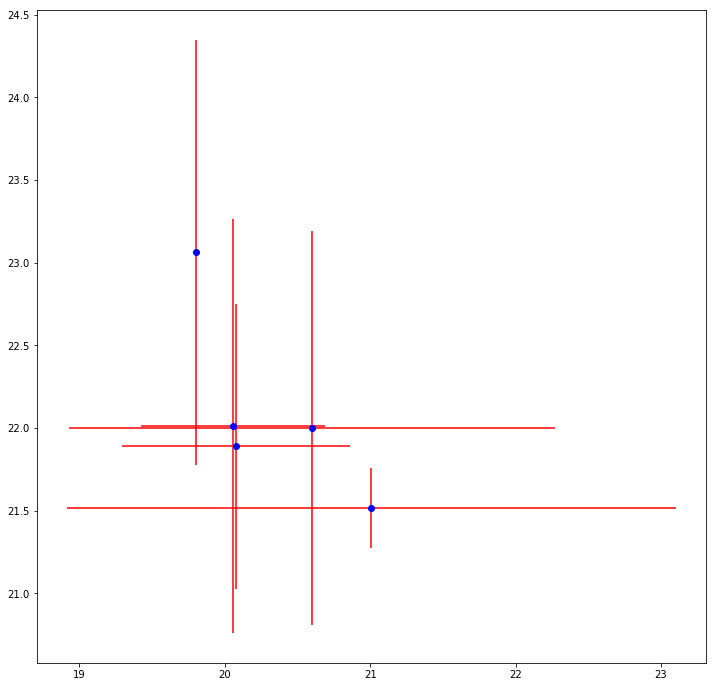

In [257]:
plt.figure(figsize=(12,12))
plt.errorbar(red_radii, (green_radii), xerr=red_radii_std, yerr=green_radii_std, fmt='o', ecolor='r', color='b')